In [43]:
# Import the necessary libraries - ok
# Define Environment Class - ok
# Define Motor - ok
# Define 1st Rocket details - ok
# Start the 1st flight - ok
# Get at the final state - ok
# Define 2nd Rocket details - ok... 
# Define "Payload Rocket" details - ok...

# Start the 2nd and 3rd flight at the same time
# Plots everything together

#-----------------
# TO-DO LIST:
# 1. Adding documentation/comments along the notebook
# 2. Understand wether we can run Monte Carlo simulations in this case or not.

#------------------
# Extra:
# Define Payload Class??
# Move Everything together from this notebook inside the utilities module? This would make things easier to use

# Assumptions: Payload will be deployed at apogee, simultaneously with Drogue Parachute

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# !pip install rocketpy netCDF4
# !git clone https://github.com/RocketPy-Team/RocketPy.git

In [6]:
import os

os.listdir()

['deployable_payload_example.ipynb',
 'dispersion_analysis',
 'environment_analysis_class_usage.ipynb',
 'environment_class_usage.ipynb',
 'getting_started.ipynb',
 'getting_started_colab.ipynb',
 'RocketPy',
 'solid_motor_class_usage.ipynb',
 'topography_usage.ipynb',
 'utilities_usage.ipynb']

In [2]:
from rocketpy import Environment, SolidMotor, Rocket, Flight, Function

In [3]:
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

In [4]:
Env = Environment(
    railLength=5.2, latitude=32.990254, longitude=-106.974998, elevation=1400
)

In [5]:
import datetime

tomorrow = datetime.date.today() + datetime.timedelta(days=1)

Env.setDate((tomorrow.year, tomorrow.month, tomorrow.day, 12))  # Hour given in UTC time

Env.setAtmosphericModel(type="Forecast", file="GFS")

Launch Site Details

Launch Rail Length: 5.2  m
Launch Date: 2022-09-28 12:00:00 UTC
Launch Site Latitude: 32.99025°
Launch Site Longitude: -106.97500°
Reference Datum: SIRGAS2000
Launch Site UTM coordinates: 315468.64 W    3651938.65 N
Launch Site UTM zone: 13S
Launch Site Surface Elevation: 1471.5 m


Atmospheric Model Details

Atmospheric Model Type: Forecast
Forecast Maximum Height: 8.000 km
Forecast Time Period: From  2022-09-27 06:00:00  to  2022-10-13 06:00:00  UTC
Forecast Hour Interval: 3  hrs
Forecast Latitude Range: From  -90.0 ° To  90.0 °
Forecast Longitude Range: From  0.0 ° To  359.75 °


Surface Atmospheric Conditions

Surface Wind Speed: 1.96 m/s
Surface Wind Direction: 113.85°
Surface Wind Heading: 293.85°
Surface Pressure: 859.57 hPa
Surface Temperature: 293.37 K
Surface Air Density: 1.021 kg/m³
Surface Speed of Sound: 343.36 m/s


Atmospheric Model Plots


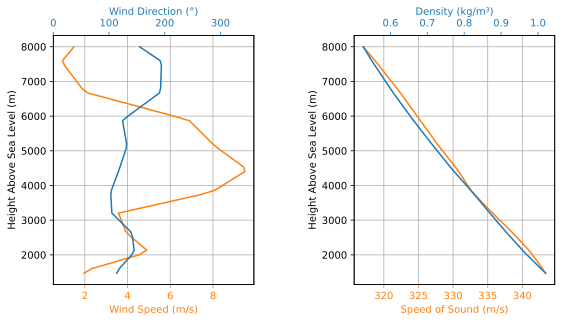

In [6]:
Env.maxExpectedHeight = 8000
Env.info()

## Motor

In [7]:
Pro75M1670 = SolidMotor(
    thrustSource="../../data/motors/Cesaroni_M1670.eng",
    burnOut=3.9,
    grainNumber=5,
    grainSeparation=5 / 1000,
    grainDensity=1815,
    grainOuterRadius=33 / 1000,
    grainInitialInnerRadius=15 / 1000,
    grainInitialHeight=120 / 1000,
    nozzleRadius=33 / 1000,
    throatRadius=11 / 1000,
    interpolationMethod="linear",
)


Motor Details
Total Burning Time: 3.9 s
Total Propellant Mass: 2.956 kg
Propellant Exhaust Velocity: 2038.745 m/s
Average Thrust: 1545.218 N
Maximum Thrust: 2200.0 N at 0.15 s after ignition.
Total Impulse: 6026.350 Ns

Plots


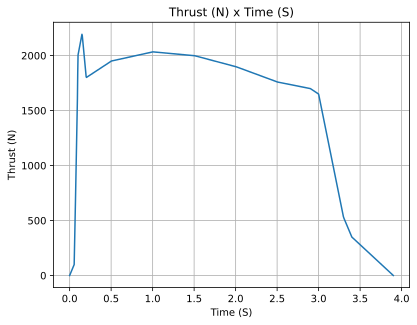

In [8]:
Pro75M1670.info()

## Creating first Rocket

In [9]:
PayloadMass = 4.5
RocketMass = 16.241 - PayloadMass  # 16.241 is the mass of the rocket including the payload but without the propellant

In [ ]:
# TODO: Create a "addRocket" and "removeRocket" method to the Flight class
# TODO: Create a "addPayload" and "removePayload" method to the Flight class
# TODO: Option b is to create a "createRocketByMass" and call it twice

In [10]:
Rocket1 = Rocket(
    motor=Pro75M1670,
    radius=127 / 2000,
    mass= RocketMass+PayloadMass,
    inertiaI=6.60,
    inertiaZ=0.0351,
    distanceRocketNozzle=-1.255,
    distanceRocketPropellant=-0.85704,
    powerOffDrag="../../data/calisto/powerOffDragCurve.csv",
    powerOnDrag="../../data/calisto/powerOnDragCurve.csv",
)

Rocket1.setRailButtons([0.2, -0.5])

NoseCone = Rocket1.addNose(length=0.55829, kind="vonKarman", distanceToCM=0.71971)

FinSet = Rocket1.addFins(
    4, span=0.100, rootChord=0.120, tipChord=0.040, distanceToCM=-1.04956
)

Tail = Rocket1.addTail(
    topRadius=0.0635, bottomRadius=0.0435, length=0.060, distanceToCM=-1.194656
)

## Simulate the first flight

In [11]:
RocketFlight1 = Flight(rocket=Rocket1, 
                    environment=Env, 
                    inclination=85, 
                    heading=0, 
                    terminateOnApogee=True)

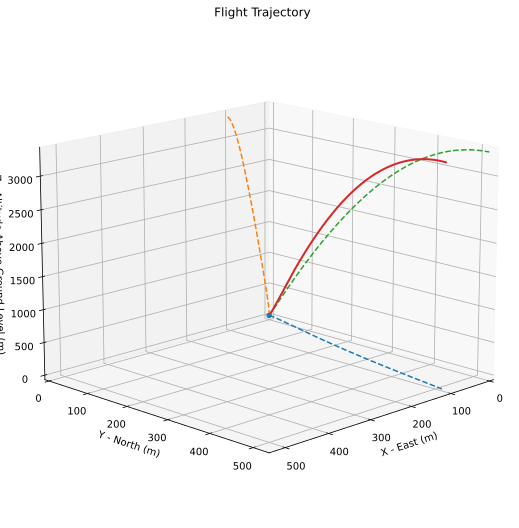

In [12]:
RocketFlight1.plot3dTrajectory()

# Get/Capture the final state solution when payload is deployed

In [37]:
# tInit = RocketFlight1.tFinal
# xInit = RocketFlight1.x(tInit)
# yInit = RocketFlight1.y(tInit)
# zInit = RocketFlight1.z(tInit)
# vxInit= RocketFlight1.vx(tInit)
# vyInit= RocketFlight1.vy(tInit)
# vzInit= RocketFlight1.vz(tInit)
# e0Init= RocketFlight1.e0(tInit)
# e1Init= RocketFlight1.e1(tInit)
# e2Init= RocketFlight1.e2(tInit)
# e3Init= RocketFlight1.e3(tInit)
# w1Init= RocketFlight1.w1(tInit)
# w2Init= RocketFlight1.w2(tInit)
# w3Init= RocketFlight1.w3(tInit)

In [13]:
Rocket2 = Rocket(
    motor=Pro75M1670,
    radius=127 / 2000,
    mass= RocketMass,
    inertiaI=6.60,
    inertiaZ=0.0351,
    distanceRocketNozzle=-1.255,
    distanceRocketPropellant=-0.85704,
    powerOffDrag=1,
    powerOnDrag=1,
)

def drogueTrigger(p, y):
    # p = pressure
    # y = [x, y, z, vx, vy, vz, e0, e1, e2, e3, w1, w2, w3]
    # activate drogue when vz < 0 m/s.
    return True if y[5] < 0 else False


def mainTrigger(p, y):
    # p = pressure
    # y = [x, y, z, vx, vy, vz, e0, e1, e2, e3, w1, w2, w3]
    # activate main when vz < 0 m/s and z < 800 + 1400 m (+1400 due to surface elevation).
    return True if y[5] < 0 and y[2] < 800 + 1400 else False

Main = Rocket2.addParachute(
    "Main",
    CdS= 7.2,
    trigger=mainTrigger,
    samplingRate=105,
    lag=1.5,
    noise=(0, 8.3, 0.5),
)

Drogue = Rocket2.addParachute(
    "Drogue",
    CdS=0.72,
    trigger=drogueTrigger,
    samplingRate=105,
    lag=1.5,
    noise=(0, 8.3, 0.5),
)

# Rocket2.setRailButtons([0.2, -0.5])

In [14]:
# Rocket2 definition:

RocketFlight2 = Flight(
            rocket=Rocket2,
            environment=Env,
            inclination=0,
            heading=0,
            maxTime=600,
            initialSolution=RocketFlight1,
            # initialSolution=[
            #     tInit, xInit, yInit, zInit, vxInit, vyInit, vzInit, e0Init, e1Init, e2Init, e3Init, w1Init, w2Init, w3Init
            #     ],
            )

In [15]:
RocketFlight2.plot3dTrajectory()

TypeError: 'function' object is not subscriptable

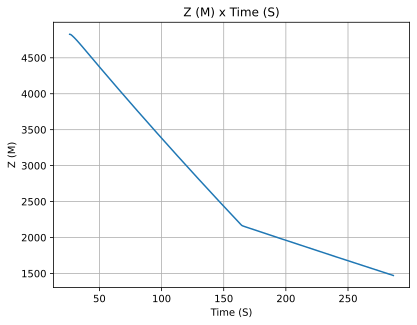

In [16]:
RocketFlight2.z()

In [17]:
RocketFlight2.allInfo()

TypeError: 'function' object is not subscriptable

In [18]:
# Define the Payload Rocket

PayloadRocket = Rocket(motor=Pro75M1670,
                          radius=127 / 2000,
                            mass=PayloadMass,
                            inertiaI=6.60,
                            inertiaZ=0.0351,
                            distanceRocketNozzle=-1.255,
                            distanceRocketPropellant=-0.85704,
                            powerOffDrag=0.5,
                            powerOnDrag=0.5,
                            )

# PayloadRocket.setRailButtons([0.2, -0.5])

def drogueTrigger(p, y):
    # p = pressure
    # y = [x, y, z, vx, vy, vz, e0, e1, e2, e3, w1, w2, w3]
    # activate drogue when vz < 0 m/s.
    return True if y[5] < 0 else False

def mainTrigger(p, y):
    # p = pressure
    # y = [x, y, z, vx, vy, vz, e0, e1, e2, e3, w1, w2, w3]
    # activate main when vz < 0 m/s and z < 800 + 1400 m (+1400 due to surface elevation).
    return True if y[5] < 0 and y[2] < 800 + 1400 else False

PayloadDrogue = PayloadRocket.addParachute(
    "Drogue",
    CdS=0.35,
    trigger=drogueTrigger,
    samplingRate=105,
    lag=1.5,
    noise=(0, 8.3, 0.5),
)

PayloadMain = PayloadRocket.addParachute(
    "Main",
    CdS= 4.0,
    trigger=mainTrigger,
    samplingRate=105,
    lag=1.5,
    noise=(0, 8.3, 0.5),
)

In [21]:
PayloadFlight = Flight(rocket=PayloadRocket,
                       environment=Env,
                       inclination=0,
                       heading=0,
                       maxTime=600,
                       initialSolution=RocketFlight1,
                    #    initialSolution=[
                    #         tInit, xInit, yInit, zInit, vxInit, vyInit, vzInit, e0Init, e1Init, e2Init, e3Init, w1Init, w2Init, w3Init
                    #         ],
            )

In [22]:
PayloadFlight.postProcess()

TypeError: 'function' object is not subscriptable

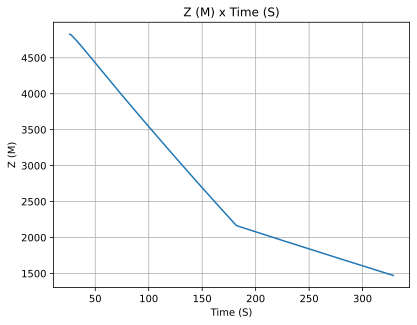

In [23]:
PayloadFlight.z()

In [ ]:
# Plots Everything together

In [24]:
from rocketpy import utilities

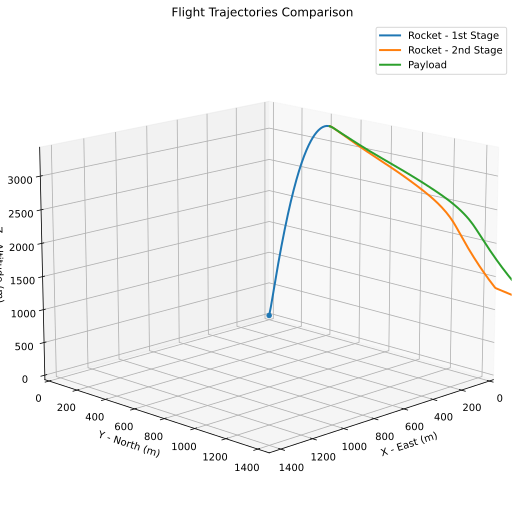

In [26]:
utilities.compareFlightTrajectories(flight_list=[RocketFlight1, RocketFlight2, PayloadFlight],
                                    names=["Rocket - 1st Stage", "Rocket - 2nd Stage", "Payload"],
                                    )

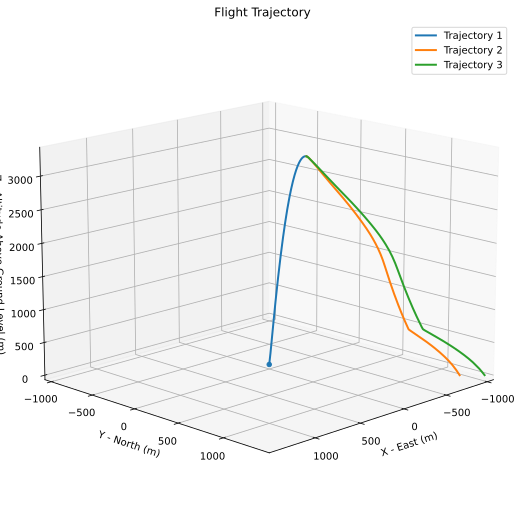

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# aka CompareRockets ? Or better... CompareFlights
# This goes on utilities module, I believe that's better
def combineTrajectories(trajectory1, trajectory2=None, trajectory3=None):
    # TODO: Add a check to make sure that the components (x, y, z) of trajectories are the same length
    # TODO: Allow the user to catch different planes (x, y, z)
    # TODO: Allow the user to input a name
    # TODO: Allow the user to set the colors
    # TODO: Make the legend optional
    # TODO: Allow the user to set the line style
    # TODO: Make it more general, so that it can be used for any number of trajectories

    x1, y1, z1 = trajectory1
    x2, y2, z2 = trajectory2 if trajectory2 else (0, 0, 0)
    x3, y3, z3 = trajectory3 if trajectory3 else (0, 0, 0)
    # x3, y3, z3 = trajectory3
    # x4, y4, z4 = d4
    # x5, y5, z5 = d5
    ###
    maxZ = max(*z1, *z2, *z3)
    maxX = max(*x1, *x2, *x3)
    minX = min(*x1, *x2, *x3)
    minY = min(*y1, *y2, *y3)
    maxY = max(*y1, *y2, *y3)
    maxXY = max(maxX, maxY)
    minXY = min(minX, minY)
    ###
    fig1 = plt.figure(figsize=(9, 9))
    ax1 = plt.subplot(111, projection="3d")
    ax1.plot(x1, y1, z1, linewidth='2', label="Trajectory 1")
    ax1.plot(x2, y2, z2, linewidth='2', label="Trajectory 2") if trajectory2 else None
    ax1.plot(x3, y3, z3, linewidth='2', label="Trajectory 3") if trajectory3 else None
    ax1.scatter(0, 0, 0)
    ax1.set_xlabel("X - East (m)")
    ax1.set_ylabel("Y - North (m)")
    ax1.set_zlabel("Z - Altitude Above Ground Level (m)")
    ax1.set_title("Flight Trajectory")
    ax1.set_zlim3d([0, maxZ])
    ax1.set_ylim3d([minXY, maxXY])
    ax1.set_xlim3d([minXY, maxXY])
    ax1.view_init(15, 45)
    plt.legend()
    plt.show()

    return None

trajectory1 = (RocketFlight1.x[:,1], RocketFlight1.y[:,1], RocketFlight1.z[:,1]-RocketFlight1.env.elevation)
trajectory2 = (RocketFlight2.x[:,1], RocketFlight2.y[:,1], RocketFlight2.z[:,1]-RocketFlight2.env.elevation)
trajectory3 = (PayloadFlight.x[:,1], PayloadFlight.y[:,1], PayloadFlight.z[:,1]-PayloadFlight.env.elevation)

combineTrajectories(trajectory1, trajectory2, trajectory3)

In [ ]:
# Exports Everything to a .kml file
### Well... This is going to be a pain challenge, but I think I can do it.
### Different flights will be different colors
